In [245]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import random

from scipy.spatial.transform import rotation

raw_data = pd.read_csv('github_bot_raw_data.csv') 
#列字段解读
columns = [
    'actor_id',  # GitHub用户的ID (示例值: 1081405)
    'label',  # 用户标签（"Human"或"Bot"） (示例值: Human)
    'login',  # GitHub用户的登录名 (示例值: dlazesz)
    'id',  # 用户的GitHub ID (示例值: 1081405)
    'node_id',  # 用户的GitHub节点ID (示例值: MDQ6VXNlcjEwODE0MDU=)
    'avatar_url',  # GitHub头像URL (示例值: https://avatars.githubusercontent.com/u/1081405?v=4)
    'url',  # GitHub用户的URL (示例值: https://api.github.com/users/dlazesz)
    'html_url',  # GitHub用户的HTML URL (示例值: https://github.com/dlazesz)
    'followers_url',  # GitHub用户的粉丝URL (示例值: https://api.github.com/users/dlazesz/followers)
    'following_url',  # GitHub用户的关注URL (示例值: https://api.github.com/users/dlazesz/following{/other_user})
    'gists_url',  # 用户的GitHub Gists URL (示例值: https://api.github.com/users/dlazesz/gists{/gist_id})
    'starred_url',  # 用户的GitHub Starred URL (示例值: https://api.github.com/users/dlazesz/starred{/owner}{/repo})
    'subscriptions_url',  # 用户的GitHub订阅URL (示例值: https://api.github.com/users/dlazesz/subscriptions)
    'organizations_url',  # 用户的GitHub组织URL (示例值: https://api.github.com/users/dlazesz/orgs)
    'repos_url',  # 用户的GitHub仓库URL (示例值: https://api.github.com/users/dlazesz/repos)
    'events_url',  # 用户的GitHub事件URL (示例值: https://api.github.com/users/dlazesz/events{/privacy})
    'received_events_url',  # 用户的GitHub接收事件URL (示例值: https://api.github.com/users/dlazesz/received_events)
    'type',  # 用户类型，通常为"User" (示例值: User)
    'site_admin',  # 表示用户是否是GitHub网站管理员的标志 (示例值: False)
    'name',  # 用户的姓名 (示例值: Indig Balázs)
    'company',  # 用户所在公司 (示例值: None)
    'blog',  # 用户的博客 (示例值: None)
    'location',  # 用户的位置 (示例值: None)
    'email',  # 用户的电子邮件 (示例值: None)
    'hireable',  # 表示用户是否愿意被雇佣的标志 (示例值: None)
    'bio',  # 用户在其GitHub资料中提供的自我介绍或个人简介 (示例值: None)
    'twitter_username',  # 用户的Twitter用户名 (示例值: None)
    'public_repos',  # 用户在GitHub上的公共代码仓库数量 (示例值: 26)
    'public_gists',  # 用户的公共Gists数量 (示例值: 1)
    'followers',  # 关注该用户的其他GitHub用户数量 (示例值: 5)
    'following',  # 该用户关注的其他GitHub用户数量 (示例值: 1)
    'created_at',  # 用户的GitHub帐户创建日期 (示例值: 2011-09-26T17:27:03Z)
    'updated_at',  # 用户的GitHub帐户最后更新日期 (示例值: 2023-10-13T11:21:10Z)
]
data = raw_data
data

,actor_id,label,login,id,node_id,avatar_url,gravatar_id,url,html_url,followers_url,...,email,hireable,bio,twitter_username,public_repos,public_gists,followers,following,created_at,updated_at
0,1081405,Human,dlazesz,1081405,MDQ6VXNlcjEwODE0MDU=,https://avatars.githubusercontent.com/u/108140...,NaN,https://api.github.com/users/dlazesz,https://github.com/dlazesz,https://api.github.com/users/dlazesz/followers,...,NaN,NaN,NaN,NaN,26,1,5,1,2011-09-26T17:27:03Z,2023-10-13T11:21:10Z
1,13100598,Human,sarkiroka,13100598,MDQ6VXNlcjEzMTAwNTk4,https://avatars.githubusercontent.com/u/131005...,NaN,https://api.github.com/users/sarkiroka,https://github.com/sarkiroka,https://api.github.com/users/sarkiroka/followers,...,NaN,True,"I just press the buttons randomly, and the pro...",NaN,30,3,9,6,2015-06-29T10:12:46Z,2023-10-07T06:26:14Z
2,22494,Human,ZoomQuiet,22494,MDQ6VXNlcjIyNDk0,https://avatars.githubusercontent.com/u/22494?v=4,NaN,https://api.github.com/users/ZoomQuiet,https://github.com/ZoomQuiet,https://api.github.com/users/ZoomQuiet/followers,...,NaN,True,"Time is unimportant,\r\nonly life important.",zoomq,103,49,1212,221,2008-08-29T16:20:03Z,2023-10-02T02:11:21Z
3,7648032,Bot,AlCutter,7648032,MDQ6VXNlcjc2NDgwMzI=,https://avatars.githubusercontent.com/u/764803...,NaN,https://api.github.com/users/AlCutter,https://github.com/AlCutter,https://api.github.com/users/AlCutter/followers,...,NaN,NaN,NaN,NaN,49,0,84,2,2014-05-20T18:43:09Z,2023-10-12T12:54:59Z
4,2163522,Human,meetyan,2163522,MDQ6VXNlcjIxNjM1MjI=,https://avatars.githubusercontent.com/u/216352...,NaN,https://api.github.com/users/meetyan,https://github.com/meetyan,https://api.github.com/users/meetyan/followers,...,NaN,True,NaN,NaN,11,1,6,2,2012-08-16T14:19:13Z,2023-10-06T11:58:41Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20353,8052756,Bot,tbreeds,8052756,MDQ6VXNlcjgwNTI3NTY=,https://avatars.githubusercontent.com/u/805275...,NaN,https://api.github.com/users/tbreeds,https://github.com/tbreeds,https://api.github.com/users/tbreeds/followers,...,tony@bakeyournoodle.com,NaN,Tony came to Linux in 1994 and has never looke...,tonybreeds,36,16,11,4,2014-07-02T23:27:34Z,2023-08-15T16:38:34Z
20354,34321341,Human,ssisil,34321341,MDQ6VXNlcjM0MzIxMzQx,https://avatars.githubusercontent.com/u/343213...,NaN,https://api.github.com/users/ssisil,https://github.com/ssisil,https://api.github.com/users/ssisil/followers,...,ssisil@pivotal.io,NaN,NaN,NaN,16,0,3,0,2017-12-06T21:56:31Z,2023-07-26T18:32:25Z
20355,15847407,Human,dbfannin,15847407,MDQ6VXNlcjE1ODQ3NDA3,https://avatars.githubusercontent.com/u/158474...,NaN,https://api.github.com/users/dbfannin,https://github.com/dbfannin,https://api.github.com/users/dbfannin/followers,...,NaN,NaN,Software engineer at RealTracs.,NaN,13,0,10,1,2015-11-14T14:44:05Z,2022-08-23T21:09:49Z
20356,94929125,Human,jambayk,94929125,U_kgDOBaiA5Q,https://avatars.githubusercontent.com/u/949291...,NaN,https://api.github.com/users/jambayk,https://github.com/jambayk,https://api.github.com/users/jambayk/followers,...,jambaykinley@microsoft.com,NaN,NaN,NaN,7,0,2,0,2021-11-23T18:55:29Z,2023-10-06T22:50:45Z


In [246]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20358 entries, 0 to 20357
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   actor_id             20358 non-null  int64  
 1   label                20358 non-null  object 
 2   login                20358 non-null  object 
 3   id                   20358 non-null  int64  
 4   node_id              20358 non-null  object 
 5   avatar_url           20358 non-null  object 
 6   gravatar_id          0 non-null      float64
 7   url                  20358 non-null  object 
 8   html_url             20358 non-null  object 
 9   followers_url        20358 non-null  object 
 10  following_url        20358 non-null  object 
 11  gists_url            20358 non-null  object 
 12  starred_url          20358 non-null  object 
 13  subscriptions_url    20358 non-null  object 
 14  organizations_url    20358 non-null  object 
 15  repos_url            20358 non-null 

In [247]:
#删除重复数据，并且输出去重前后的数据量
print(f"去重前的数据量为{len(data.index)}")
data.drop_duplicates(keep='first',inplace=True)
print(f"去重后的数据量为{len(data.index)}")

去重前的数据量为20358
去重后的数据量为19779


In [248]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19779 entries, 0 to 20348
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   actor_id             19779 non-null  int64  
 1   label                19779 non-null  object 
 2   login                19779 non-null  object 
 3   id                   19779 non-null  int64  
 4   node_id              19779 non-null  object 
 5   avatar_url           19779 non-null  object 
 6   gravatar_id          0 non-null      float64
 7   url                  19779 non-null  object 
 8   html_url             19779 non-null  object 
 9   followers_url        19779 non-null  object 
 10  following_url        19779 non-null  object 
 11  gists_url            19779 non-null  object 
 12  starred_url          19779 non-null  object 
 13  subscriptions_url    19779 non-null  object 
 14  organizations_url    19779 non-null  object 
 15  repos_url            19779 non-null  obje

In [249]:
#缺失值处理
data.drop("gravatar_id",axis=1,inplace=True)

In [250]:
print(data.isna().sum())

actor_id                   0
label                      0
login                      0
id                         0
node_id                    0
avatar_url                 0
url                        0
html_url                   0
followers_url              0
following_url              0
gists_url                  0
starred_url                0
subscriptions_url          0
organizations_url          0
repos_url                  0
events_url                 0
received_events_url        0
type                       0
site_admin                 0
name                    2589
company                 8982
blog                   11263
location                7080
email                  11739
hireable               16481
bio                    10930
twitter_username       14859
public_repos               0
public_gists               0
followers                  0
following                  0
created_at                 0
updated_at                 0
dtype: int64


In [251]:
data['hireable']=data['hireable'].fillna("")
data['hireable']

0            
1        True
2        True
3            
4        True
         ... 
20344        
20345        
20346        
20347        
20348        
Name: hireable, Length: 19779, dtype: object

In [252]:
data['hireable'].astype(bool)

0        False
1         True
2         True
3        False
4         True
         ...  
20344    False
20345    False
20346    False
20347    False
20348    False
Name: hireable, Length: 19779, dtype: bool

In [253]:
print(data.isnull().sum())
for item in data.columns:
    if data[item].isna().sum() > 0 and data[item].dtype == 'object':
        data[item]=data[item].fillna("")
print(data.isnull().sum())

actor_id                   0
label                      0
login                      0
id                         0
node_id                    0
avatar_url                 0
url                        0
html_url                   0
followers_url              0
following_url              0
gists_url                  0
starred_url                0
subscriptions_url          0
organizations_url          0
repos_url                  0
events_url                 0
received_events_url        0
type                       0
site_admin                 0
name                    2589
company                 8982
blog                   11263
location                7080
email                  11739
hireable                   0
bio                    10930
twitter_username       14859
public_repos               0
public_gists               0
followers                  0
following                  0
created_at                 0
updated_at                 0
dtype: int64
actor_id               0
label

In [254]:
#数据变换，变为时间戳
data['created_at']=pd.to_datetime(data['created_at'])
data['updated_at']=pd.to_datetime(data['updated_at'])

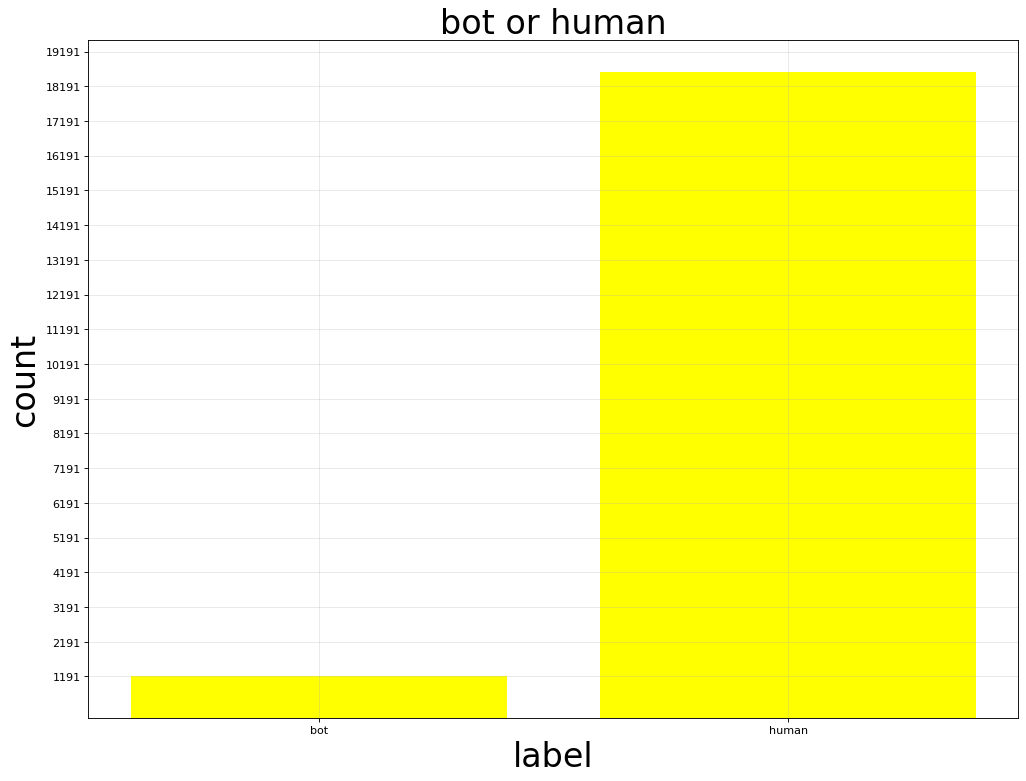

In [255]:
#数据可视化
grouped=data.groupby(data['label'])['name'].count().tolist()
plt.figure(figsize=(15,11),edgecolor='yellow',dpi=80)
plt.bar(['bot','human'],grouped,color='yellow')
plt.yticks(range(min(grouped),max(grouped)+1001,1000))
plt.xlabel("label",fontsize=30)
plt.ylabel("count",fontsize=30)
plt.grid(alpha=0.3)
plt.title("bot or human",fontsize=30)
plt.show()


In [256]:
data.set_index(['label','created_at'],inplace=True)

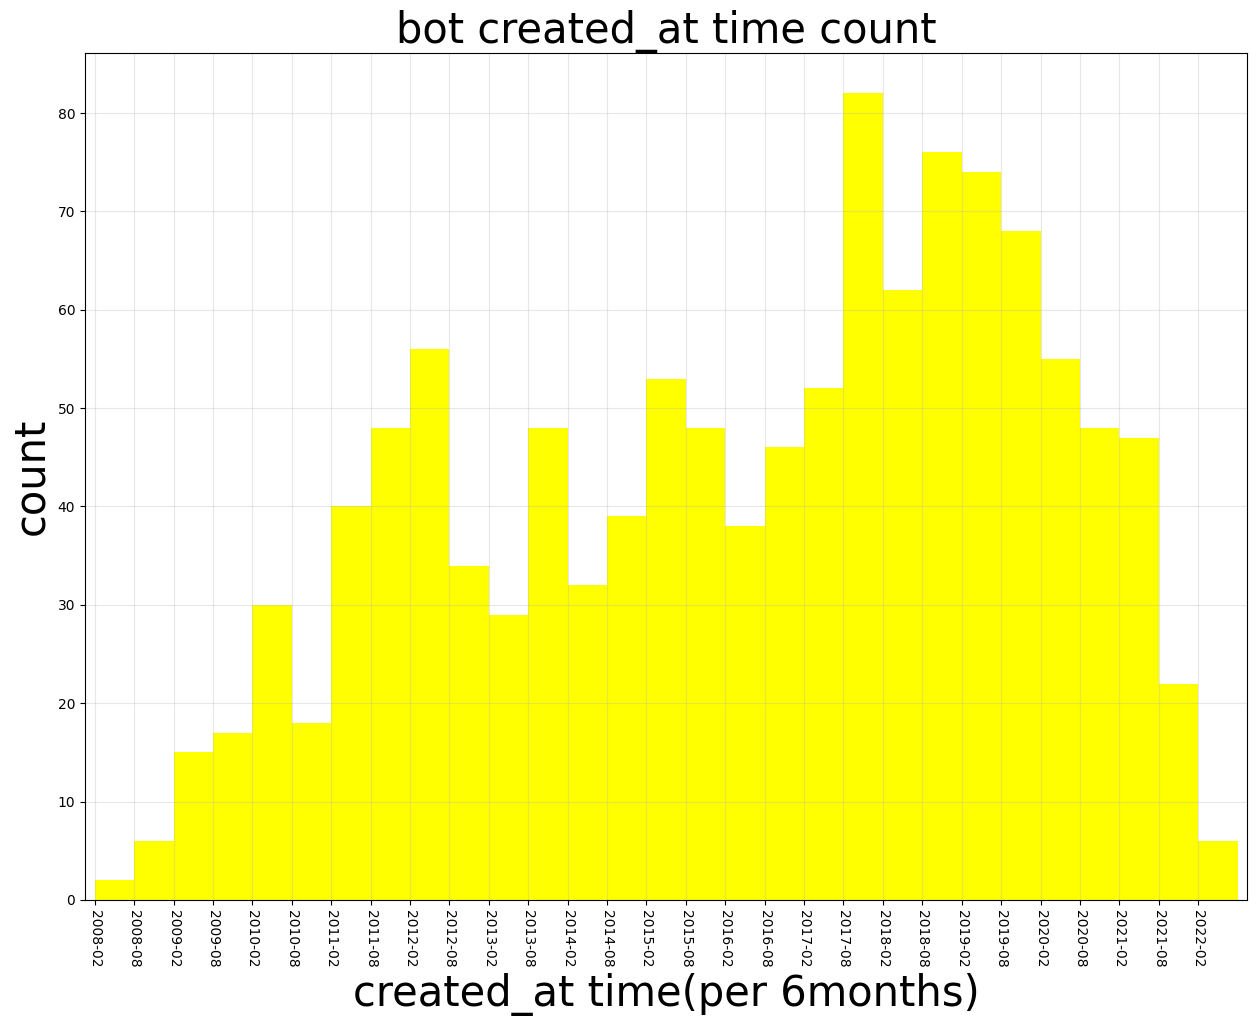

In [257]:
from matplotlib.ticker import MaxNLocator
ax=data.loc["Bot"].resample('6ME').count()['name'].plot(kind='bar', color='yellow',width=1,figsize=(15,11),grid=True)

# 获取当前x轴刻度
ticks = ax.get_xticks()

# 将刻度左移 0.5（可以根据需求调整移动的距离）
new_ticks = ticks - 0.5

# 设置新的x轴刻度
ax.set_xticks(new_ticks)
new_labels = data.loc["Bot"].resample('6ME').count()['name'].index.strftime('%Y-%m')  # 设置为年月格式或其他你需要的格式

# 设置新的x轴刻度标签
ax.set_xticklabels(new_labels)
# 调整图表
plt.title("bot created_at time count",fontsize=30)
plt.xlabel("created_at time(per 6months)",fontsize=30)
plt.ylabel("count",fontsize=30)
plt.grid(alpha=0.3)
plt.xticks(rotation=270)  # 如果需要旋转刻度标签，避免重叠
plt.show()

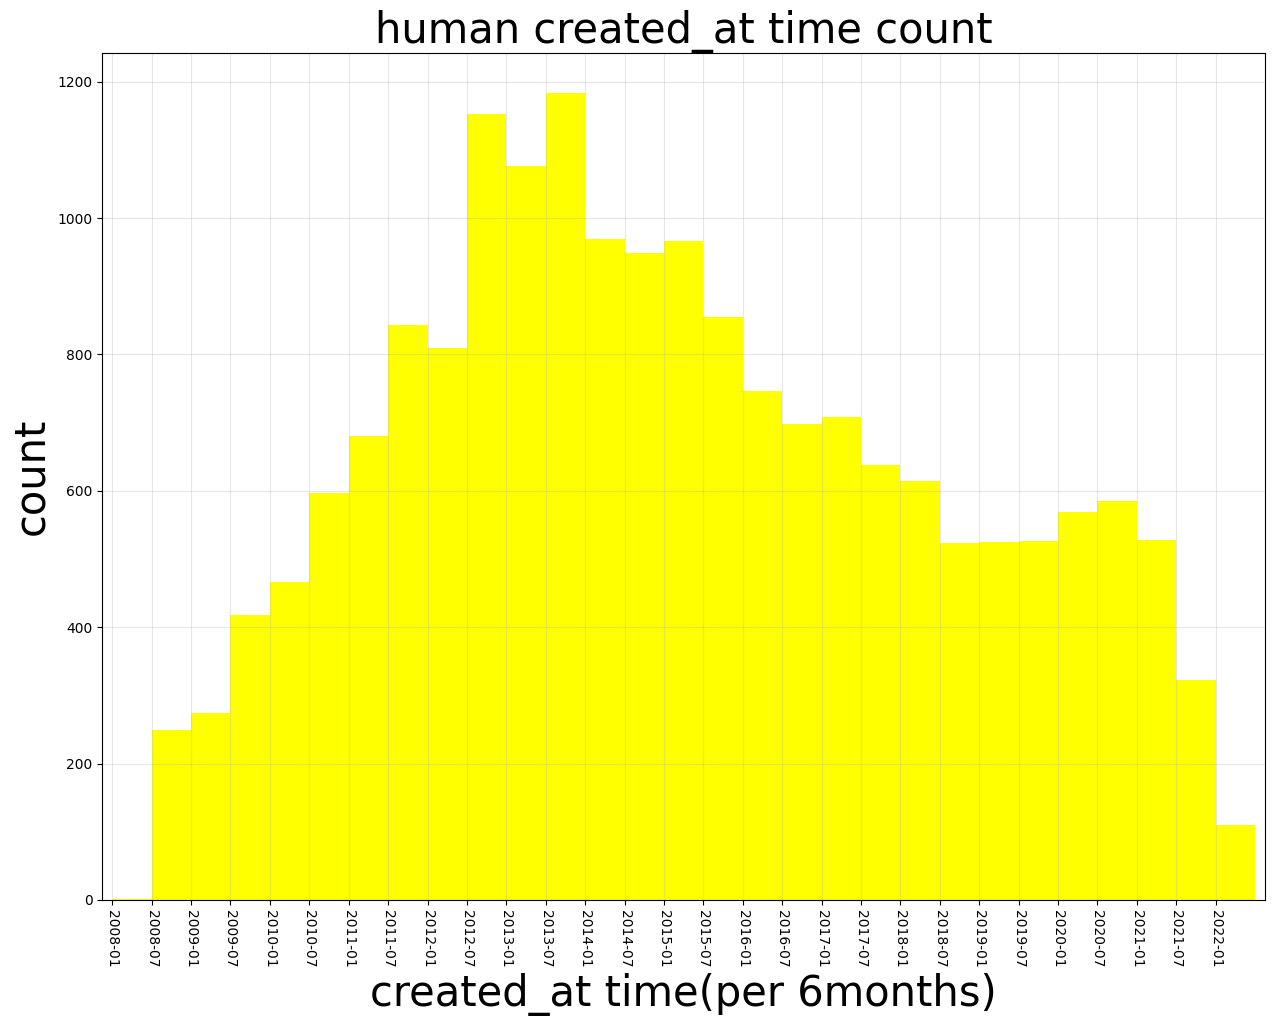

In [258]:
from matplotlib.ticker import MaxNLocator
ax=data.loc["Human"].resample('6ME').count()['name'].plot(kind='bar', color='yellow',width=1,figsize=(15,11),grid=True)

# 获取当前x轴刻度
ticks = ax.get_xticks()

# 将刻度左移 0.5（可以根据需求调整移动的距离）
new_ticks = ticks - 0.5

# 设置新的x轴刻度
ax.set_xticks(new_ticks)
new_labels = data.loc["Human"].resample('6ME').count()['name'].index.strftime('%Y-%m')  # 设置为年月格式或其他你需要的格式

# 设置新的x轴刻度标签
ax.set_xticklabels(new_labels)
# 调整图表
plt.title("human created_at time count",fontsize=30)
plt.xlabel("created_at time(per 6months)",fontsize=30)
plt.ylabel("count",fontsize=30)
plt.grid(alpha=0.3)
plt.xticks(rotation=270)  # 如果需要旋转刻度标签，避免重叠
plt.show()

In [259]:
data.reset_index(level=1, inplace=True)

In [260]:
grouped=data.groupby(by=data.index)
temp=[]
for item in grouped:
    temp+=item[1].loc[:,["followers","following"]].sum().tolist()

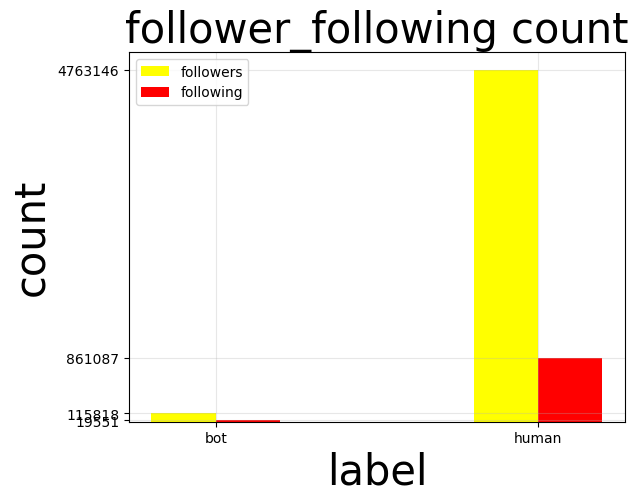

<Figure size 800x400 with 0 Axes>

In [261]:
plt.grid(alpha=0.3)
plt.xlabel("label",fontsize=30)
plt.ylabel("count",fontsize=30)
plt.title("follower_following count",fontsize=30)
plt.bar([0,1],[temp[0],temp[2]],color='yellow',width=0.2,label="followers")
plt.bar([0.2,1.2],[temp[1],temp[3]],color='red',width=0.2,label="following")
plt.legend()
plt.xticks([0.1,1.1],["bot","human"])
plt.yticks(temp,[str(item) for item in temp])
plt.figure(figsize=(10,5),edgecolor='yellow',dpi=80)
plt.show()

In [263]:
data.to_csv("github_bot_cleaned_data.csv")